# Mass segmentation using INBreast dataset

> Indented block







In [ ]:
!pip install google.colab
  

     |████████████████████████████████| 81kB 6.7MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 112kB 25.2MB/s 
     |████████████████████████████████| 8.0MB 19.8MB/s 
     |████████████████████████████████| 10.1MB 38.4MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 491kB 41.3MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for google.colab: filename=google_colab-1.0.0-py2.py3-none-any.whl size=102290 sha256=eb0132a480e009239dd7f9ac51ceccd1de564c85adbad56d13b34a712ce90584
  Stored in directory: /root/.cache/pip/wheels/38/0d/59/701e300a337b2a2e07b27fe74dbfff0bc56ac58f711566ee67
  Created wheel for portpicker: filename=portpicker-1.2.0-cp37-none-any.whl size=13383 sha256=7c966f86461b3e774b2023f0dc5cc52ca9aff1d69adf2f3eef1c120d87f791fa
  Stored in directory: /root/.cache/pip/wheels/4a/45/47/1e126be9d4605e71f00d6e6fb151611f2f4cb9770b050c7d2d
  Created wheel for

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import tensorflow as tf
import pandas as pd
from tqdm import tqdm
import os
from cv2 import imread, createCLAHE 
import cv2
from glob import glob
%matplotlib inline
import matplotlib.pyplot as plt



# select saagaar123@gmail.com drive

image_path = os.path.join('/content/drive/My Drive/mammogram_segmentation/INB/mass')
mask_path = os.path.join('/content/drive/My Drive/mammogram_segmentation/INB/mask/')


They can inspected the concerning dataset seperately [here](http://https://www.kaggle.com/kmader/pulmonary-chest-xray-abnormalities/home).

In [ ]:
# we have 704 masks but 800 images. Hence we are going to
# make a 1-1 correspondance from mask to images, not the usual other way.
images = os.listdir(image_path)
mask = os.listdir(mask_path)
mask = [fName.split(".png")[0] for fName in mask]
image_file_name = [fName.split("_segmentation")[0] for fName in mask]

In [ ]:
print(images)

['DDSM_CBIS_000214.png', 'DDSM_CBIS_000213.png', 'DDSM_CBIS_000212.png', 'DDSM_CBIS_000211.png', 'DDSM_CBIS_000210.png', 'DDSM_CBIS_000209.png', 'DDSM_CBIS_000208.png', 'DDSM_CBIS_000207.png', 'DDSM_CBIS_000206.png', 'DDSM_CBIS_000204.png', 'DDSM_CBIS_000202.png', 'DDSM_CBIS_000203.png', 'DDSM_CBIS_000205.png', 'DDSM_CBIS_000200.png', 'DDSM_CBIS_000199.png', 'DDSM_CBIS_000201.png', 'DDSM_CBIS_000197.png', 'DDSM_CBIS_000198.png', 'DDSM_CBIS_000195.png', 'DDSM_CBIS_000196.png', 'DDSM_CBIS_000194.png', 'DDSM_CBIS_000193.png', 'DDSM_CBIS_000191.png', 'DDSM_CBIS_000192.png', 'DDSM_CBIS_000189.png', 'DDSM_CBIS_000190.png', 'DDSM_CBIS_000186.png', 'DDSM_CBIS_000187.png', 'DDSM_CBIS_000188.png', 'DDSM_CBIS_000184.png', 'DDSM_CBIS_000185.png', 'DDSM_CBIS_000182.png', 'DDSM_CBIS_000183.png', 'DDSM_CBIS_000178.png', 'DDSM_CBIS_000179.png', 'DDSM_CBIS_000177.png', 'DDSM_CBIS_000180.png', 'DDSM_CBIS_000181.png', 'DDSM_CBIS_000175.png', 'DDSM_CBIS_000176.png', 'DDSM_CBIS_000174.png', 'DDSM_CBIS_0001

In [ ]:
print(mask)

['DDSM_CBIS_000213_segmentation', 'DDSM_CBIS_000214_segmentation', 'DDSM_CBIS_000163_segmentation', 'DDSM_CBIS_000162_segmentation', 'DDSM_CBIS_000176_segmentation', 'DDSM_CBIS_000164_segmentation', 'DDSM_CBIS_000175_segmentation', 'DDSM_CBIS_000127_segmentation', 'DDSM_CBIS_000170_segmentation', 'DDSM_CBIS_000160_segmentation', 'DDSM_CBIS_000209_segmentation', 'DDSM_CBIS_000169_segmentation', 'DDSM_CBIS_000158_segmentation', 'DDSM_CBIS_000167_segmentation', 'DDSM_CBIS_000187_segmentation', 'DDSM_CBIS_000181_segmentation', 'DDSM_CBIS_000199_segmentation', 'DDSM_CBIS_000183_segmentation', 'DDSM_CBIS_000143_segmentation', 'DDSM_CBIS_000123_segmentation', 'DDSM_CBIS_000165_segmentation', 'DDSM_CBIS_000195_segmentation', 'DDSM_CBIS_000173_segmentation', 'DDSM_CBIS_000154_segmentation', 'DDSM_CBIS_000196_segmentation', 'DDSM_CBIS_000177_segmentation', 'DDSM_CBIS_000207_segmentation', 'DDSM_CBIS_000146_segmentation', 'DDSM_CBIS_000210_segmentation', 'DDSM_CBIS_000200_segmentation', 'DDSM_CBI

In [ ]:
check = [i for i in mask if "segmentation" in i]
print("Total mask that has modified name:",len(check))

Total mask that has modified name: 214


Earlier I was going to train on the Shenzhen dataset while perform prediction on the Montgomery dataset. However, the nature of the data was diffrent in both the set. The images from Shenzhen dataset had smaller lung-to-image ratio as compared to the Montgomery dataset.

Thus, I am loading the two dataset seperately which I combined once I got to know about the disparity.

In [ ]:
testing_files = set(os.listdir(image_path)) & set(os.listdir(mask_path))
training_files = check

def getData(X_shape, flag = "test"):
    im_array = []
    mask_array = []
    
    if flag == "test":
        for i in tqdm(testing_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i)),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i)),(X_shape,X_shape))[:,:,0]
            
            im_array.append(im)
            mask_array.append(mask)
        
        return im_array,mask_array
    
    if flag == "train":
        for i in tqdm(training_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i.split("_segmentation")[0]+".png")),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i+".png")),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

In [ ]:
#perform sanity check

def plotMask(X,y):
    sample = []
    
    for i in range(6):
        left = X[i]
        right = y[i]
        combined = np.hstack((left,right))
        sample.append(combined)
        
        
    for i in range(0,6,3):

        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])
        
        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])
        
        
        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])
        
        plt.show()

In [ ]:
# Load training and testing data
dim = 256*2
X_train,y_train = getData(dim,flag="train")
#X_test, y_test = getData(dim,flag="test")

100%|██████████| 214/214 [05:19<00:00,  1.49s/it]


# Perform Sanity Check

It is prudent to perform sanity check of the data correspondance. It become a routine check-up after a while but it is very crucial to check if we had made a mistake in loading the data.

training set


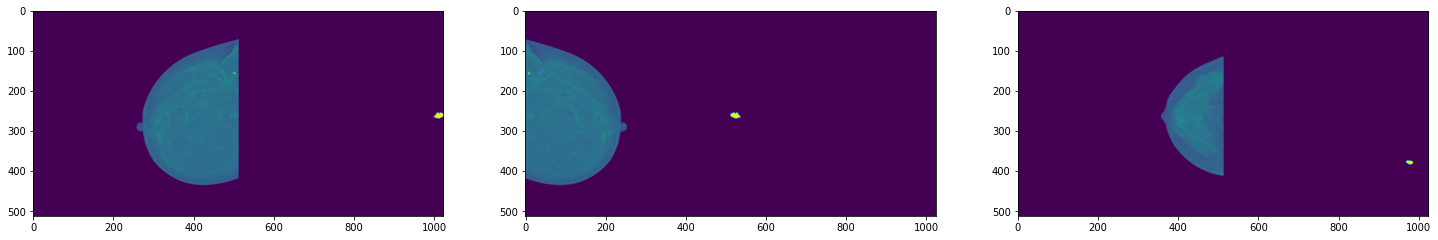

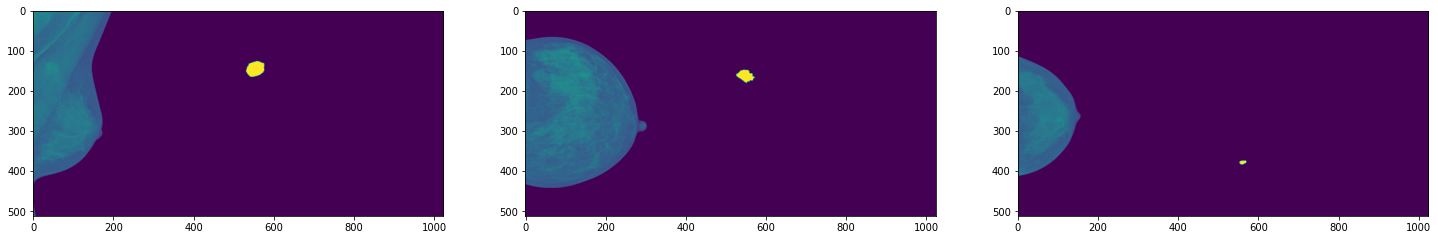

In [ ]:
print("training set")
plotMask(X_train,y_train)
#print("testing set")
#plotMask(X_test,y_test)

Both the sets looks correct. Let's combine them and further use them as a unified dataset.

In [ ]:
X_train = np.array(X_train).reshape(len(X_train),dim,dim,1)
y_train = np.array(y_train).reshape(len(y_train),dim,dim,1)
#X_test = np.array(X_test).reshape(len(X_test),dim,dim,1)
#y_test = np.array(y_test).reshape(len(y_test),dim,dim,1)
assert X_train.shape == y_train.shape
#assert X_test.shape == y_test.shape
#images = np.concatenate((X_train,X_test),axis=0)
#mask  = np.concatenate((y_train,y_test),axis=0)
images = X_train
mask = y_train

## Define  the network and callbacks

I am going to use my favourite segmentation network - U-Nets. You can read about them [here](https://arxiv.org/abs/1505.04597).

In [ ]:
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras import backend as keras
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, LearningRateScheduler


def dice_coef(y_true, y_pred):
    y_true_f = keras.flatten(y_true)
    y_pred_f = keras.flatten(y_pred)
    intersection = keras.sum(y_true_f * y_pred_f)
    return (2. * intersection + 1) / (keras.sum(y_true_f) + keras.sum(y_pred_f) + 1)

def dice_coef_loss(y_true, y_pred):
    return -dice_coef(y_true, y_pred)

    
def BCDU_net_D3(input_size = (256,256,1)):
    N = input_size[0]
    inputs = Input(input_size) 
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
  
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    drop3 = Dropout(0.5)(conv3)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    # D1
    conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)     
    conv4_1 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4_1 = Dropout(0.5)(conv4_1)
    # D2
    conv4_2 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(drop4_1)     
    conv4_2 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_2)
    conv4_2 = Dropout(0.5)(conv4_2)
    # D3
    merge_dense = concatenate([conv4_2,drop4_1], axis = 3)
    conv4_3 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge_dense)     
    conv4_3 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4_3)
    drop4_3 = Dropout(0.5)(conv4_3)

    up6 = Conv2DTranspose(256, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(drop4_3)
    up6 = BatchNormalization(axis=3)(up6)
    up6 = Activation('relu')(up6)

    x1 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 256))(drop3)
    x2 = Reshape(target_shape=(1, np.int32(N/4), np.int32(N/4), 256))(up6)
    merge6  = concatenate([x1,x2], axis = 1) 
    merge6 = ConvLSTM2D(filters = 128, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge6)
            
    conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = Conv2DTranspose(128, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv6)
    up7 = BatchNormalization(axis=3)(up7)
    up7 = Activation('relu')(up7)

    x1 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 128))(conv2)
    x2 = Reshape(target_shape=(1, np.int32(N/2), np.int32(N/2), 128))(up7)
    merge7  = concatenate([x1,x2], axis = 1) 
    merge7 = ConvLSTM2D(filters = 64, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge7)
        
    conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = Conv2DTranspose(64, kernel_size=2, strides=2, padding='same',kernel_initializer = 'he_normal')(conv7)
    up8 = BatchNormalization(axis=3)(up8)
    up8 = Activation('relu')(up8)    

    x1 = Reshape(target_shape=(1, N, N, 64))(conv1)
    x2 = Reshape(target_shape=(1, N, N, 64))(up8)
    merge8  = concatenate([x1,x2], axis = 1) 
    merge8 = ConvLSTM2D(filters = 32, kernel_size=(3, 3), padding='same', return_sequences = False, go_backwards = True,kernel_initializer = 'he_normal' )(merge8)    
    
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv8 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)
    conv9 = Conv2D(1, 1, activation = 'sigmoid')(conv8)

    model = Model(inputs = inputs, outputs = conv9)

    model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model



#### Compile and train the Unet Model

In [ ]:
model = BCDU_net_D3(input_size=(dim,dim,1))
model.compile(optimizer=Adam(lr=1e-5), loss=dice_coef_loss,
                  metrics=[dice_coef, 'binary_accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_20 (Conv2D)              (None, 512, 512, 64) 640         input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_20[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_21[0][0]                  
______________________________________________________________________________________________

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Callbacks, Early Stopping and Reduced LR


In [ ]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights_best.h5".format('cxr_reg')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

reduceLROnPlat = ReduceLROnPlateau(monitor='val_loss', factor=0.5, 
                                   patience=3, 
                                   verbose=1, mode='min', epsilon=0.0001, cooldown=2, min_lr=1e-6)
early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=15) # probably needs to be more patient, but kaggle time is limited
callbacks_list = [checkpoint, early, reduceLROnPlat]

#### Train the model

I intially used a 60-40 train-test spit and got a loss of -0.97. However, the better way to do it is 80-10-10 train-test-validation spit. Below I am roughly doing the later.

In [ ]:
from IPython.display import clear_output
from keras.optimizers import Adam 
from sklearn.model_selection import train_test_split

model.compile(optimizer=Adam(lr=2e-4), #optimizer=tf.keras.optimizers.SGD(learning_rate=0.1) ; optimizer=Adam(lr=2e-4)
              loss=['binary_crossentropy'], #loss=['binary_crossentropy'];loss=[dice_coef_loss]
           metrics = [dice_coef, 'binary_accuracy'])

train_vol, validation_vol, train_seg, validation_seg = train_test_split((images-127.0)/127.0, 
                                                            (mask>127).astype(np.float32), 
                                                            test_size = 0.1,random_state = 2018)

train_vol, test_vol, train_seg, test_seg = train_test_split(train_vol,train_seg, 
                                                            test_size = 0.1, 
                                                            random_state = 2018)

loss_history = model.fit(x = train_vol,
                       y = train_seg,
                         batch_size = 2,
                  epochs = 30,
                  validation_data =(test_vol,test_seg) ,
                  callbacks=callbacks_list)

#clear_output()
                                                                        

print(validation_vol.shape)

## Plot the metric and evaluate 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(loss_history.history['loss'], '-', label = 'Loss')
ax1.plot(loss_history.history['val_loss'], '-', label = 'Validation Loss')
ax1.legend()

ax2.plot(100*np.array(loss_history.history['binary_accuracy']), '-', 
         label = 'Accuracy')
ax2.plot(100*np.array(loss_history.history['val_binary_accuracy']), '-',
         label = 'Validation Accuracy')
ax2.legend()

## Test the model

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_seg[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score


y_scores = preds.reshape(preds.shape[0]*preds.shape[1]*preds.shape[2]*preds.shape[3], 1)
print(y_scores.shape)

y_true = validation_seg.reshape(validation_seg.shape[0]*validation_seg.shape[1]*validation_seg.shape[2]*validation_seg.shape[3], 1)

y_scores = np.where(y_scores>0.5, 1, 0)
y_true   = np.where(y_true>0.5, 1, 0)


output_folder = '/content/drive/My Drive/mammogram_segmentation/INB'

#Area under the ROC curve
fpr, tpr, thresholds = roc_curve((y_true), y_scores)
AUC_ROC = roc_auc_score(y_true, y_scores)
print ("\nArea under the ROC curve: " +str(AUC_ROC))
roc_curve =plt.figure()
plt.plot(fpr,tpr,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_ROC)
plt.title('ROC curve')
plt.xlabel("FPR (False Positive Rate)")
plt.ylabel("TPR (True Positive Rate)")
plt.legend(loc="lower right")
plt.savefig(output_folder+"ROC.png")

In [ ]:
#Precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
precision = np.fliplr([precision])[0] 
recall = np.fliplr([recall])[0]
AUC_prec_rec = np.trapz(precision,recall)
print ("\nArea under Precision-Recall curve: " +str(AUC_prec_rec))
prec_rec_curve = plt.figure()
plt.plot(recall,precision,'-',label='Area Under the Curve (AUC = %0.4f)' % AUC_prec_rec)
plt.title('Precision - Recall curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower right")
plt.savefig(output_folder+"Precision_recall.png")

In [ ]:
#Confusion matrix
threshold_confusion = 0.5
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((y_scores.shape[0]))
for i in range(y_scores.shape[0]):
    if y_scores[i]>=threshold_confusion:
        y_pred[i]=1
    else:
        y_pred[i]=0
confusion = confusion_matrix(y_true, y_pred)
print (confusion)
accuracy = 0
if float(np.sum(confusion))!=0:
    accuracy = float(confusion[0,0]+confusion[1,1])/float(np.sum(confusion))
print ("Global Accuracy: " +str(accuracy))
specificity = 0
if float(confusion[0,0]+confusion[0,1])!=0:
    specificity = float(confusion[0,0])/float(confusion[0,0]+confusion[0,1])
print ("Specificity: " +str(specificity))
sensitivity = 0
if float(confusion[1,1]+confusion[1,0])!=0:
    sensitivity = float(confusion[1,1])/float(confusion[1,1]+confusion[1,0])
print ("Sensitivity: " +str(sensitivity))
precision = 0
if float(confusion[1,1]+confusion[0,1])!=0:
    precision = float(confusion[1,1])/float(confusion[1,1]+confusion[0,1])
print ("Precision: " +str(precision))

#Jaccard similarity index
jaccard_index = jaccard_score(y_true, y_pred)
print ("\nJaccard similarity score: " +str(jaccard_index))

#F1 score
F1_score = f1_score(y_true, y_pred, labels=None, average='binary', sample_weight=None)
print ("\nF1 score (F-measure): " +str(F1_score))

In [ ]:
#Save the results
file_perf = open(output_folder+'performances.txt', 'w')
file_perf.write("Area under the ROC curve: "+str(AUC_ROC)
                + "\nArea under Precision-Recall curve: " +str(AUC_prec_rec)
                + "\nJaccard similarity score: " +str(jaccard_index)
                + "\nF1 score (F-measure): " +str(F1_score)
                +"\n\nConfusion matrix:"
                +str(confusion)
                +"\nACCURACY: " +str(accuracy)
                +"\nSENSITIVITY: " +str(sensitivity)
                +"\nSPECIFICITY: " +str(specificity)
                +"\nPRECISION: " +str(precision)
                )
file_perf.close()

# Save 10 results with error rate lower than threshold
threshold = 300
predictions = np.where(preds>0.5, 1, 0)
te_mask     = np.where(validation_seg>0.5, 1, 0)
good_prediction = np.zeros([predictions.shape[0],1], np.uint8)
id_m = 0
for idx in range(predictions.shape[0]):
    esti_sample = predictions[idx]
    true_sample = te_mask[idx]
    esti_sample = esti_sample.reshape(esti_sample.shape[0]*esti_sample.shape[1]*esti_sample.shape[2], 1)
    true_sample = true_sample.reshape(true_sample.shape[0]*true_sample.shape[1]*true_sample.shape[2], 1)
    er = 0
    for idy in range(true_sample.shape[0]):
        if esti_sample[idy] != true_sample[idy]:
           er = er +1
    if er <threshold:
       good_prediction[id_m] = idx    
       id_m += 1   


fig,ax = plt.subplots(10,3,figsize=[15,15])
titles = ['Source', 'Generated', 'Expected']
for idx in range(10):
    #plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    ax[idx, 0].imshow(np.squeeze(validation_vol[good_prediction[idx,0]]))
    ax[idx, 1].imshow(np.squeeze(te_mask[good_prediction[idx,0]]), cmap='gray')
    ax[idx, 2].imshow(np.squeeze(predictions[good_prediction[idx,0]]), cmap='gray')

plt.savefig(output_folder+'sample_results.png')

In [ ]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(np.squeeze(preds[i]))
    plt.xlabel("Pridiction")

In [ ]:
plt.figure(figsize=(30,20))
for i in range(0,21,3):
    plt.subplot(7,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[i]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(7,3,i+2)
    plt.imshow(np.squeeze(validation_seg[i]))
    plt.xlabel("Mask")
    
    plt.subplot(7,3,i+3)
    plt.imshow(np.squeeze(preds[i]))
    plt.xlabel("Pridiction")

In [ ]:
np.save("preds",preds)
np.save("validation_vol",validation_vol)
np.save("validation_seg",validation_seg)

In [ ]:
sagar    = np.load('preds.npy')


plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.imshow(np.squeeze(sagar[i]))
    plt.xlabel("Pridiction")


In [ ]:
#from keras.models import load_model
#from numpy import load

#model = load_model('cxr_reg_weights.best.h5')

Loading the testing dataset

In [ ]:
image_path = os.path.join('/content/drive/My Drive/Lung Segmentation/COVID-19')
images = os.listdir(image_path)

In [ ]:
testing_files = set(os.listdir(image_path)) 


def getData(X_shape, flag = "test"):
    im_array = []
    
    
    if flag == "test":
        for i in tqdm(testing_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i)),(X_shape,X_shape))[:,:,0]
            im_array.append(im)
            
        
        return im_array
    
    if flag == "train":
        for i in tqdm(training_files): 
            im = cv2.resize(cv2.imread(os.path.join(image_path,i.split("_mask")[0]+".png")),(X_shape,X_shape))[:,:,0]
            mask = cv2.resize(cv2.imread(os.path.join(mask_path,i+".png")),(X_shape,X_shape))[:,:,0]

            im_array.append(im)
            mask_array.append(mask)

        return im_array,mask_array

In [ ]:

S_test = getData(dim,flag="test")

In [ ]:
#perform sanity check

def plotMask(X):
    sample = []
    
    for i in range(6):
        left = X[i]
        right = X[i+1]
        combined = np.hstack((left,right))
        sample.append(combined)
        
        
    for i in range(0,6,3):

        plt.figure(figsize=(25,10))
        
        plt.subplot(2,3,1+i)
        plt.imshow(sample[i])
        
        plt.subplot(2,3,2+i)
        plt.imshow(sample[i+1])
        
        
        plt.subplot(2,3,3+i)
        plt.imshow(sample[i+2])
        
        plt.show()

In [ ]:
plotMask(S_test)

In [ ]:
S_test = np.array(S_test).reshape(len(S_test),dim,dim,1)

In [ ]:
validation_vol = (S_test-127.0)/127.0 

In [ ]:
pred_candidates = np.random.randint(1,validation_vol.shape[0],10)
preds = model.predict(validation_vol)

plt.figure(figsize=(20,10))

for i in range(0,9,3):
    plt.subplot(3,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(3,3,i+2)
    plt.imshow(np.squeeze(validation_vol[pred_candidates[i]]))
    plt.xlabel("Mask")
    
    plt.subplot(3,3,i+3)
    plt.imshow(np.squeeze(preds[pred_candidates[i]]))
    plt.xlabel("Pridiction")

In [ ]:
plt.figure(figsize=(30,20))
for i in range(0,21,3):
    plt.subplot(7,3,i+1)
    
    plt.imshow(np.squeeze(validation_vol[i]))
    plt.xlabel("Base Image")
    
    
    plt.subplot(7,3,i+2)
    plt.imshow(np.squeeze(preds[i]))
    plt.xlabel("Mask")
    
    plt.subplot(7,3,i+3)
    plt.imshow(np.squeeze(preds[i]))
    plt.xlabel("Pridiction")

In [ ]:
print(preds.shape)

In [ ]:
print(validation_vol.shape)

In [ ]:
cd '/content/drive/My Drive/Lung Segmentation/'


In [ ]:
np.save("preds",preds)
np.save("validation_vol",validation_vol)
#np.save("validation_seg",validation_seg)